In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

## Figure 1: One exemplary time series.

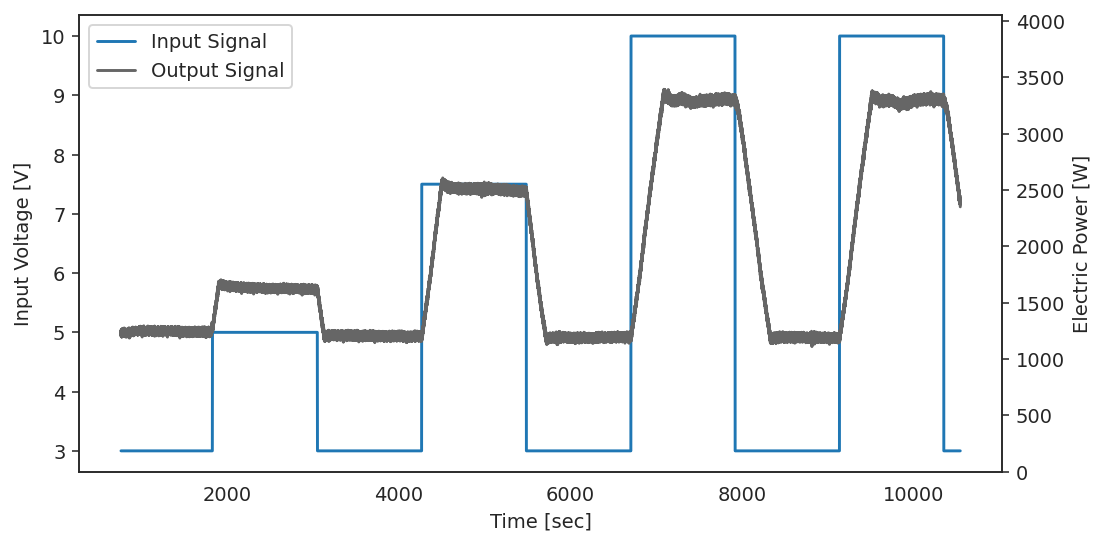

In [2]:
def plot_dataset(ax, data):
    line1, = ax.plot(data['time'], data['input_voltage'], label='Input Signal')
    ax.set_xlabel('Time [sec]')
    ax.set_ylabel('Input Voltage [V]')

    ax2 = ax.twinx()
    line2, = ax2.plot(data['time'], data['el_power'], label='Output Signal', color='#666666')
    ax2.set_ylabel('Electric Power [W]')
    ax2.set_ylim(0, 4050)

    labels = [l.get_label() for l in [line1, line2]]
    ax.legend([line1, line2], labels, loc='upper left')


data = pd.read_csv('ex_4.csv')

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 4), dpi=140)

plot_dataset(ax1, data)

fig.tight_layout()
plt.show()

## Figure 2: Data-driven methods can struggle to model the transitions when training data is limited.

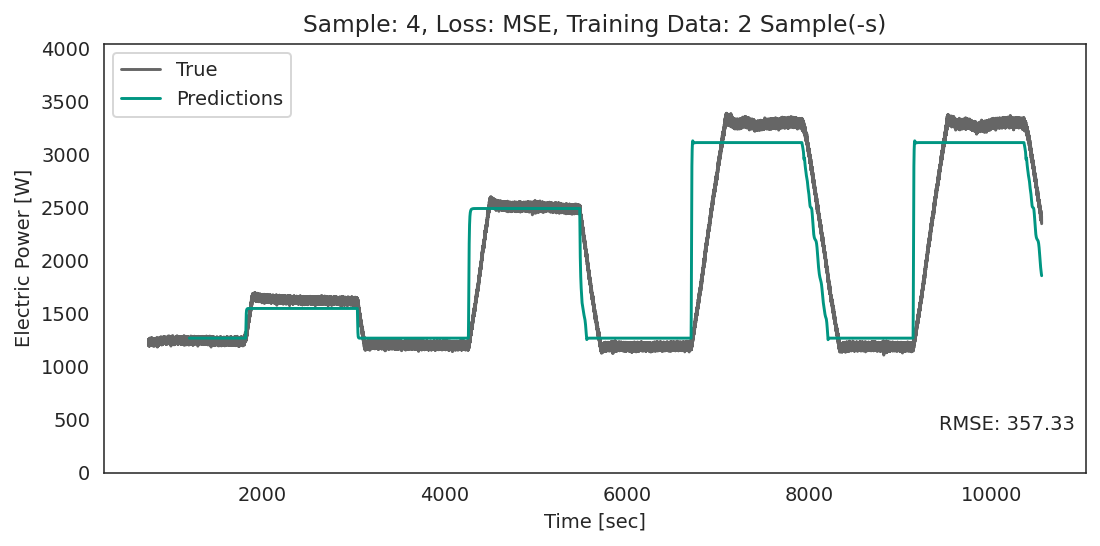

In [3]:
def plot_and_calculate_rmse(df, df_pred, ax, sample_id, loss_type, pred_col, n_train_samples):
    sns.lineplot(data=df, ax=ax, x='time', y='el_power', color='#666666', label='True')
    sns.lineplot(data=df_pred, ax=ax, x='time', y=pred_col, color='#009682', label='Predictions')
    ax.set_ylabel('Electric Power [W]')
    ax.set_xlabel('Time [sec]')
    ax.set_title(f'Sample: {sample_id}, Loss: {loss_type}, Training Data: {n_train_samples} Sample(-s)')
    ax.set_ylim([0, 4050])
    rmse = ((df['el_power'][-len(df_pred[pred_col]):].to_numpy() - df_pred[pred_col].to_numpy()) ** 2).mean() ** 0.5
    ax.text(0.85, 0.1, f'RMSE: {rmse:.2f}', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))


data_true = pd.read_csv(f'ex_4.csv')
data_pred = pd.read_csv(f'ex_4_mse_pred.csv')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4), dpi=140)

plot_and_calculate_rmse(data_true, data_pred, ax, sample_id=4, loss_type='MSE', pred_col='el_power', n_train_samples=2)

fig.tight_layout()
plt.show()

## Figure 3: Prediction error (mean RMSE ± standard deviation) over training-set size.

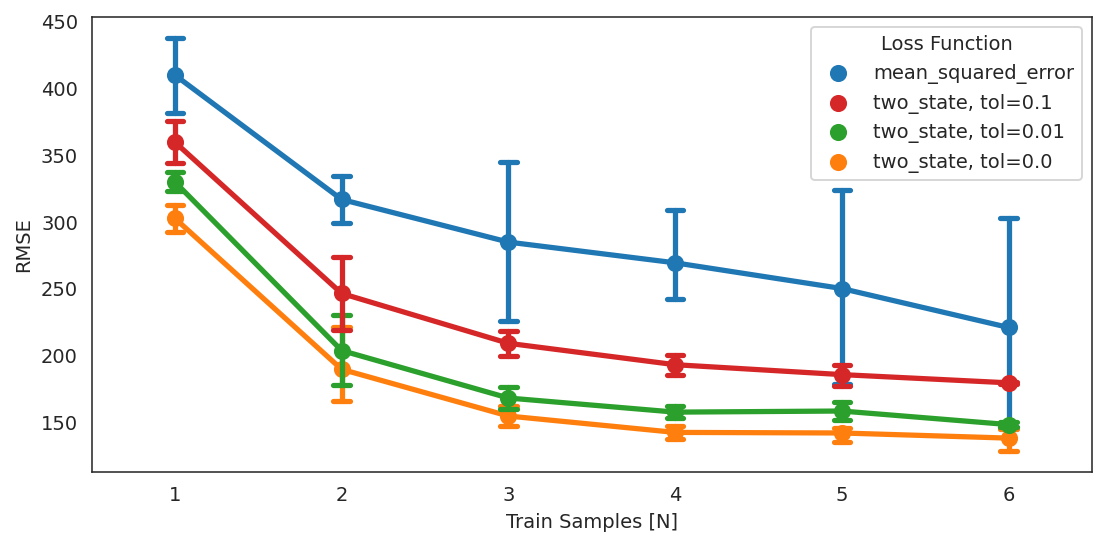

In [4]:
data = pd.read_csv('different_sizes.csv')

mse_4 = data[(data['loss_function'] == 'mean_squared_error') & (data['n_train_samples'] == 4)]['test_rmse'].mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4), dpi=140)

sns.pointplot(
    ax=axes,
    data=data,
    x='n_train_samples',
    y='test_rmse',
    hue='loss_combination',
    capsize=0.1,
    errorbar='sd'
).set(xlabel='Train Samples [N]', ylabel='RMSE')

handles, labels = axes.get_legend_handles_labels()
label_order = {
    'mean_squared_error': 0,
    'two_state, tol=0.1': 1,
    'two_state, tol=0.01': 2,
    'two_state, tol=0.0': 3
}
adjusted_labels = []
for label in labels:
    if label == 'mean_squared_error, tol=0.0':
        adjusted_label = 'mean_squared_error'
    else:
        adjusted_label = label.replace('soft_weighted_', '')
    adjusted_labels.append(adjusted_label)
paired = zip(handles, adjusted_labels)
sorted_pairs = sorted(paired, key=lambda x: label_order[x[1]])
sorted_handles, sorted_labels = zip(*sorted_pairs)
axes.legend(sorted_handles, sorted_labels, title='Loss Function')

fig.tight_layout()
plt.show()

## Figure 4: Prediction error (mean RMSE ± standard deviation) over incorrect prior knowledge (correct prior knowledge in center).

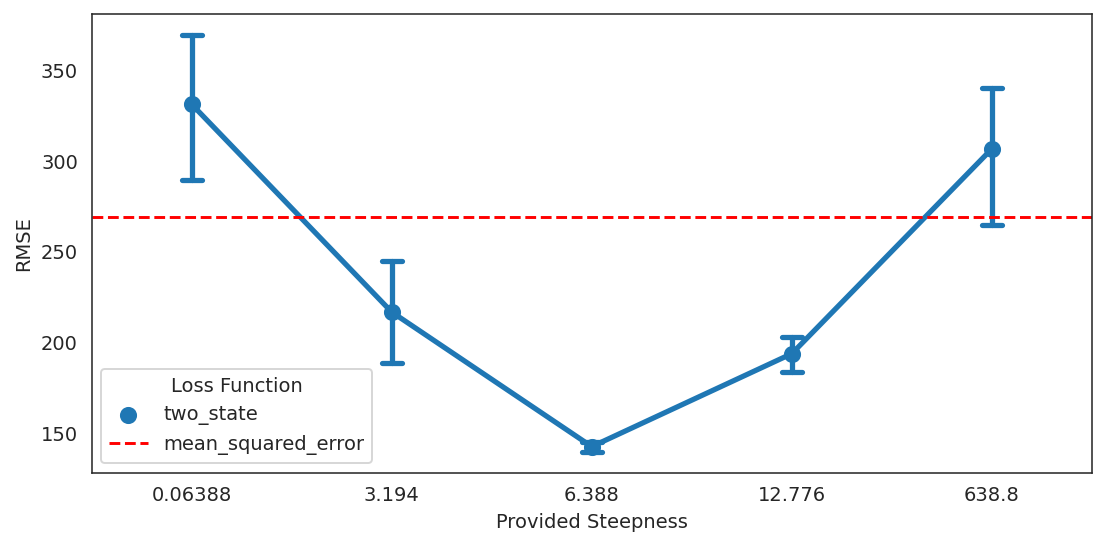

In [5]:
data = pd.read_csv('wrong_dk.csv')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4), dpi=140)
sns.pointplot(
    ax=axes,
    data=data,
    x='steepness_loss',
    y='test_rmse',
    capsize=0.1,
    errorbar='sd',
    hue='loss_function'
).set(xlabel='Provided Steepness', ylabel='RMSE')

plt.axhline(y=mse_4, linestyle='--', label='mean_squared_error', color='red')

handles, labels = axes.get_legend_handles_labels()
axes.legend(handles=handles, labels=['two_state', 'mean_squared_error'], title='Loss Function')

fig.tight_layout()
plt.show()

## Figure 5: The predictions of the best of five models.

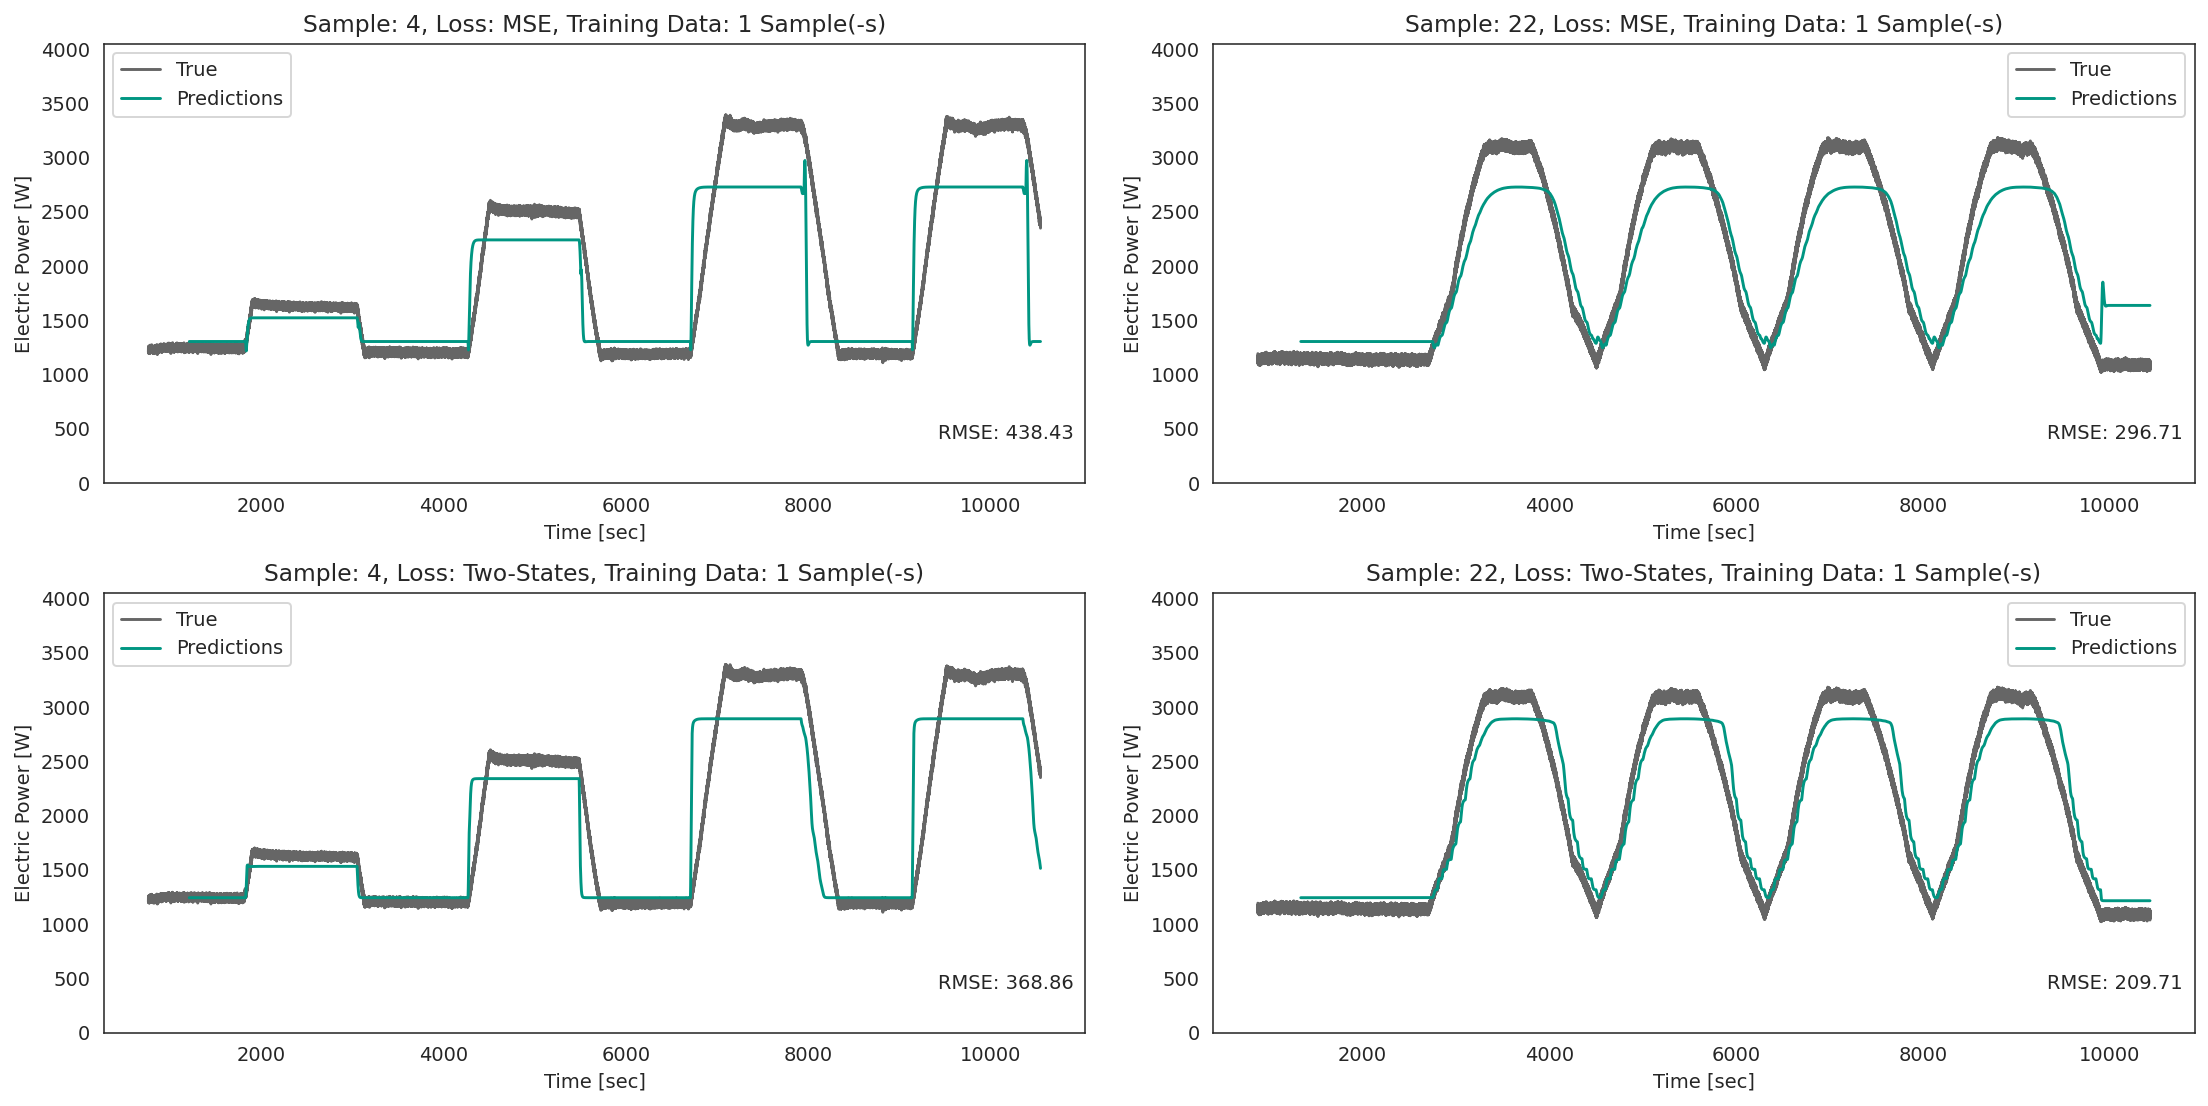

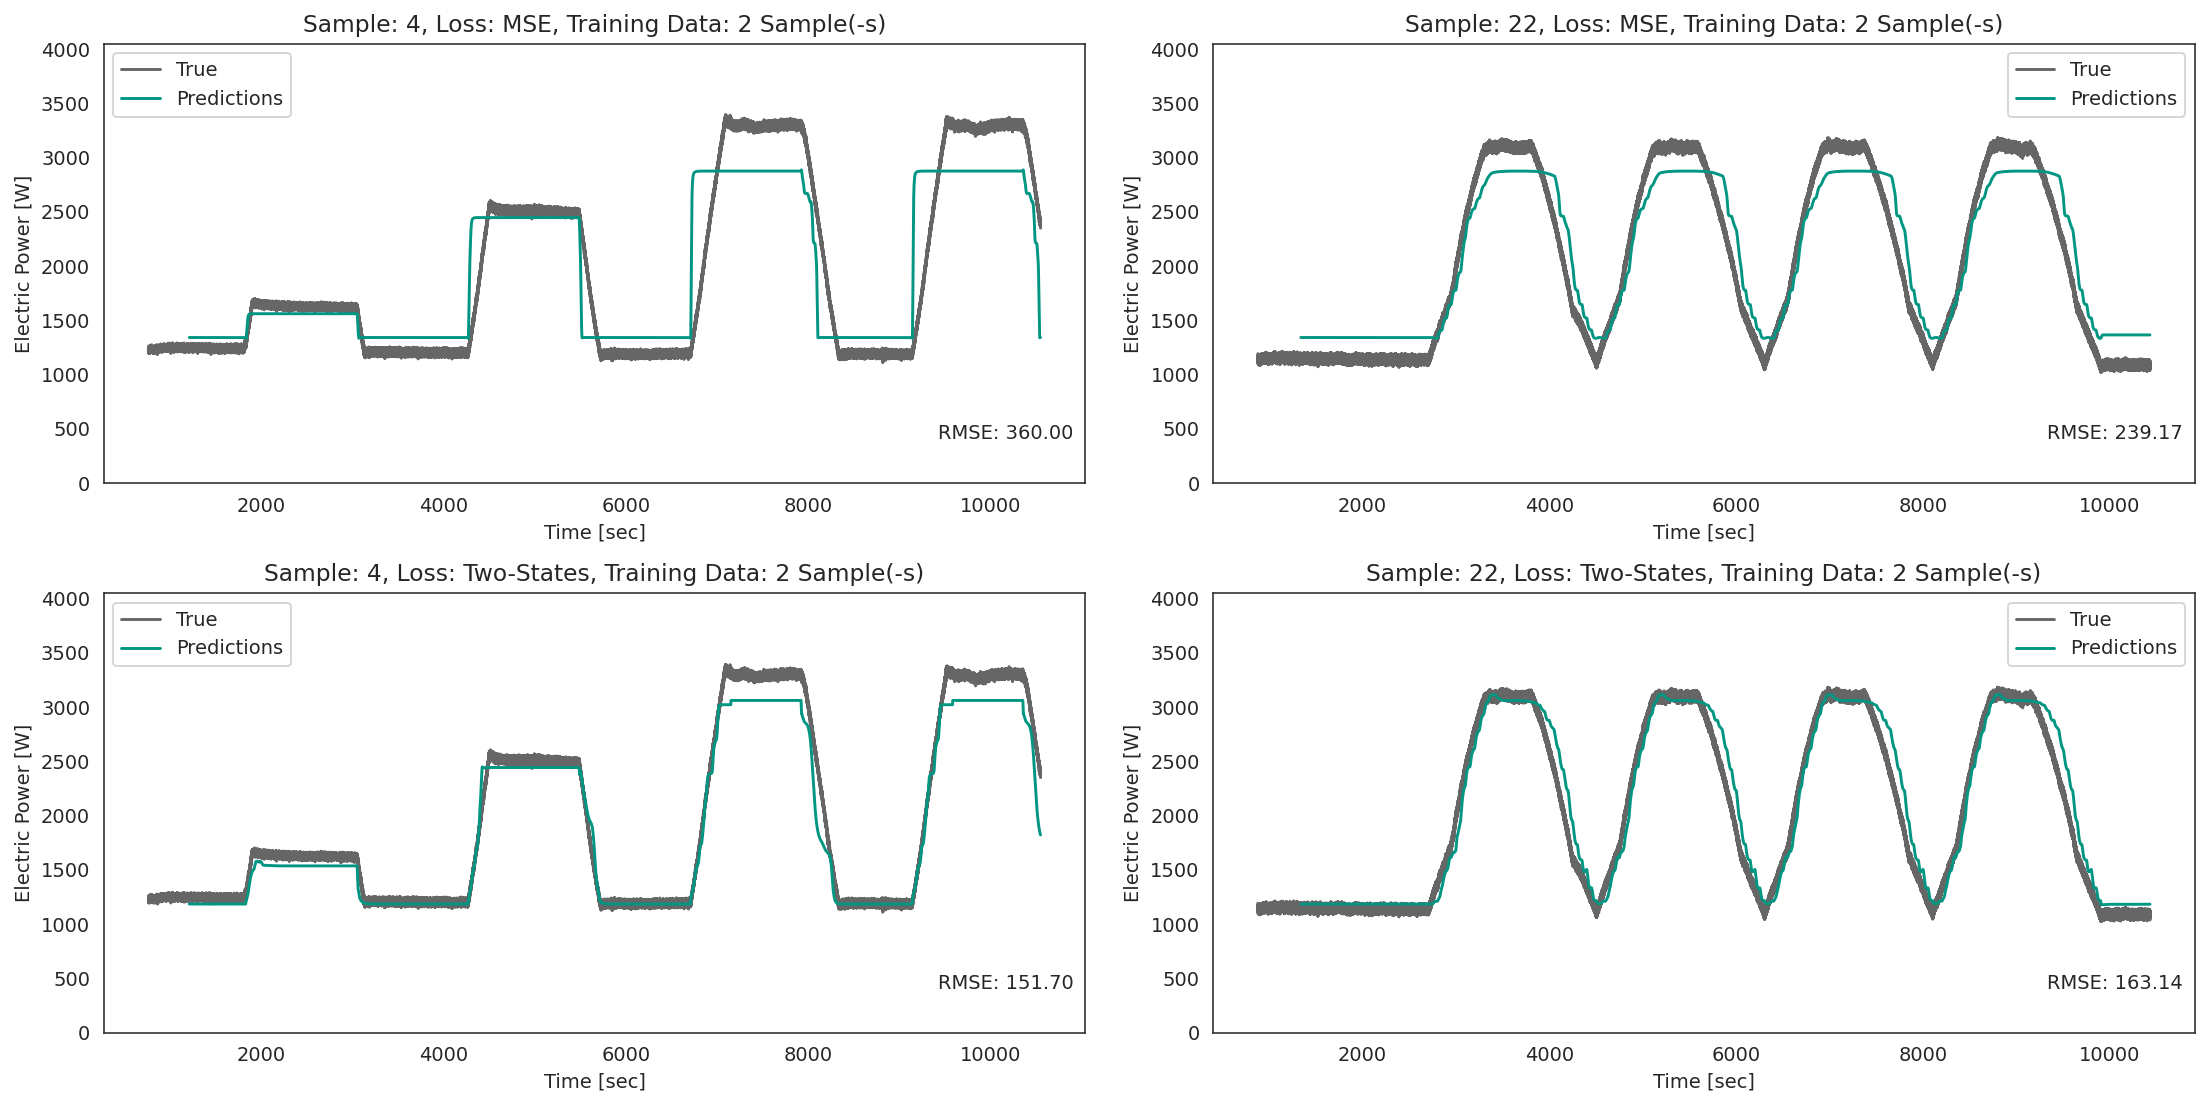

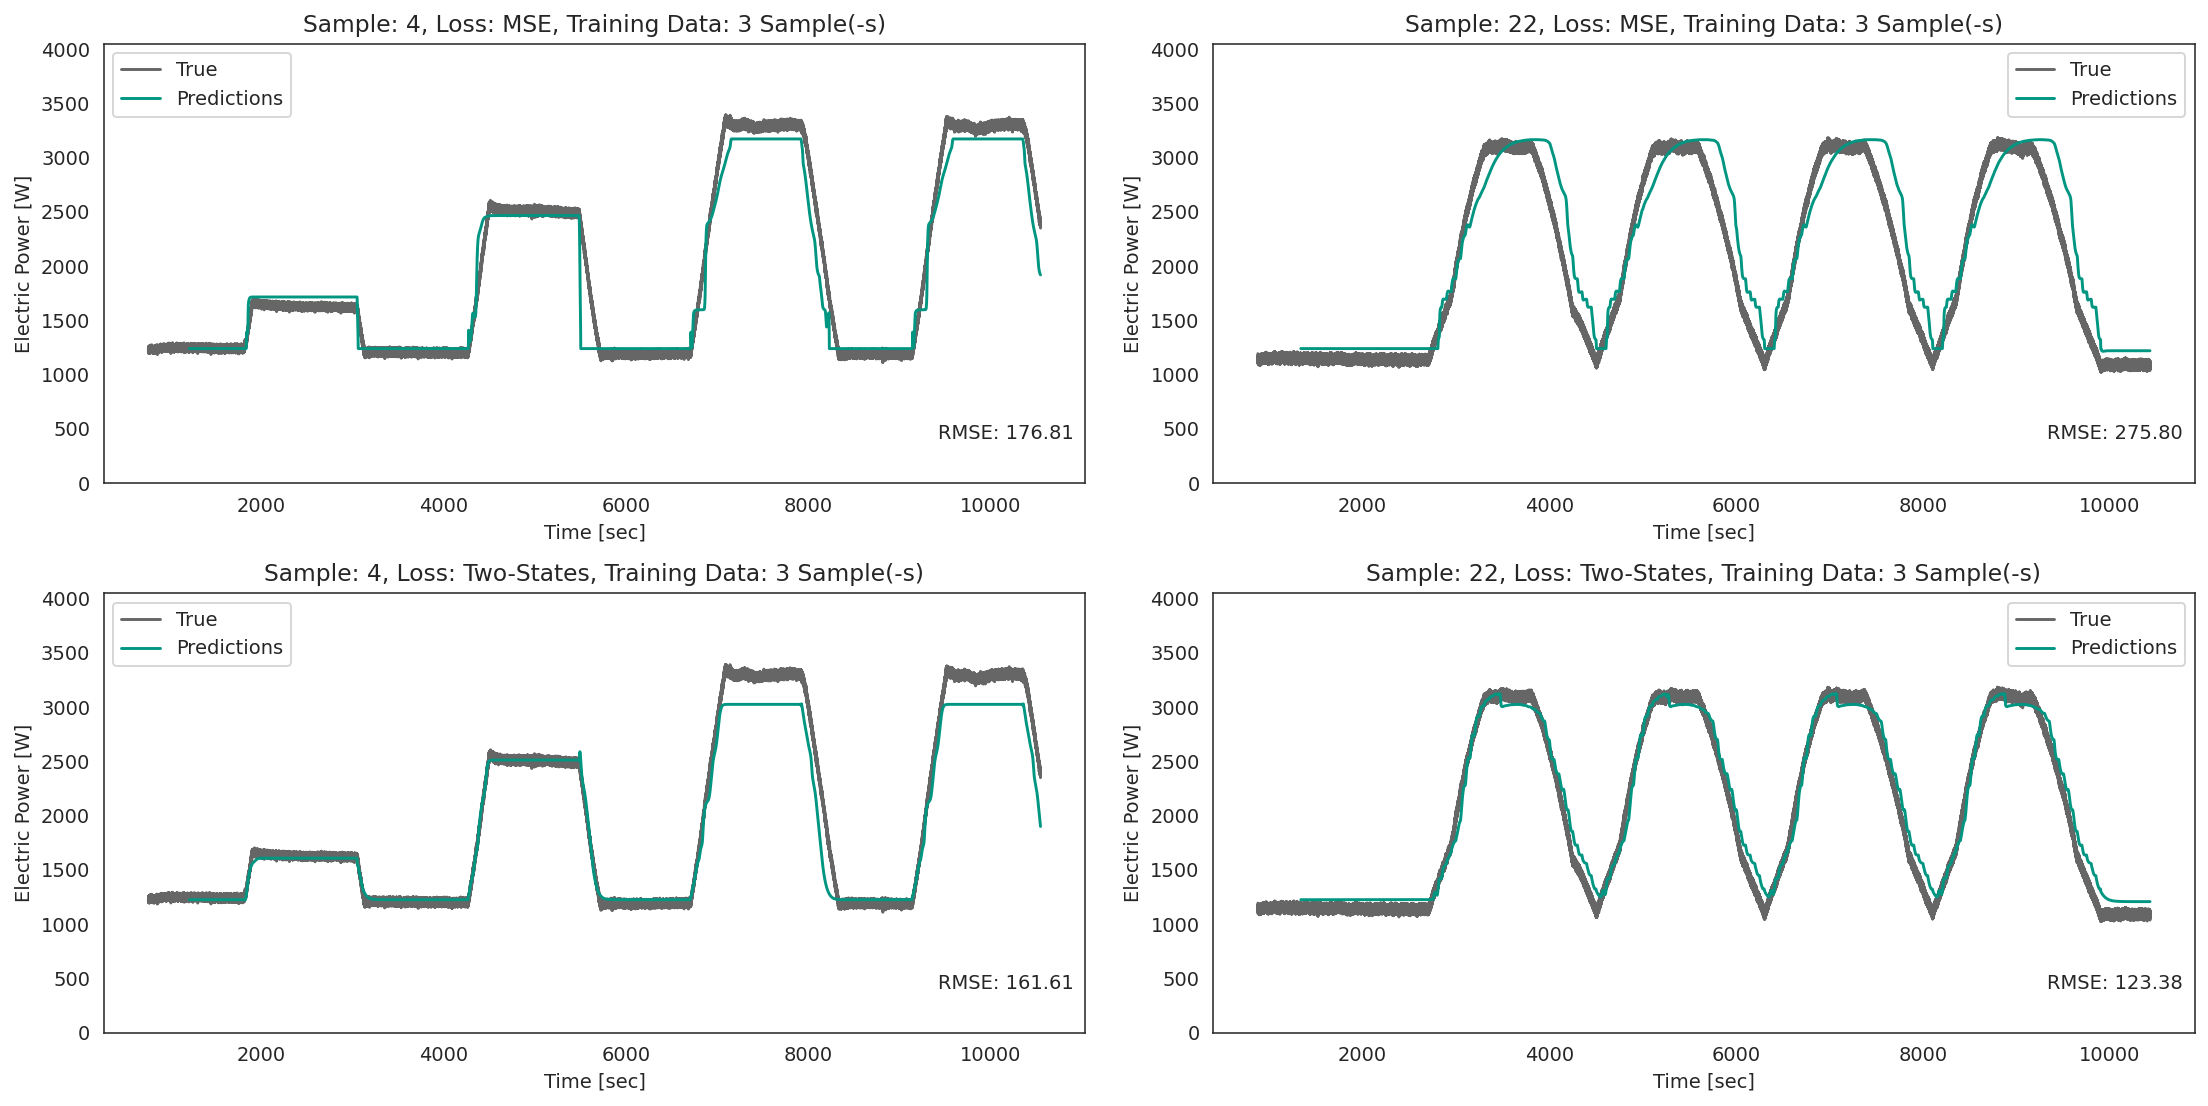

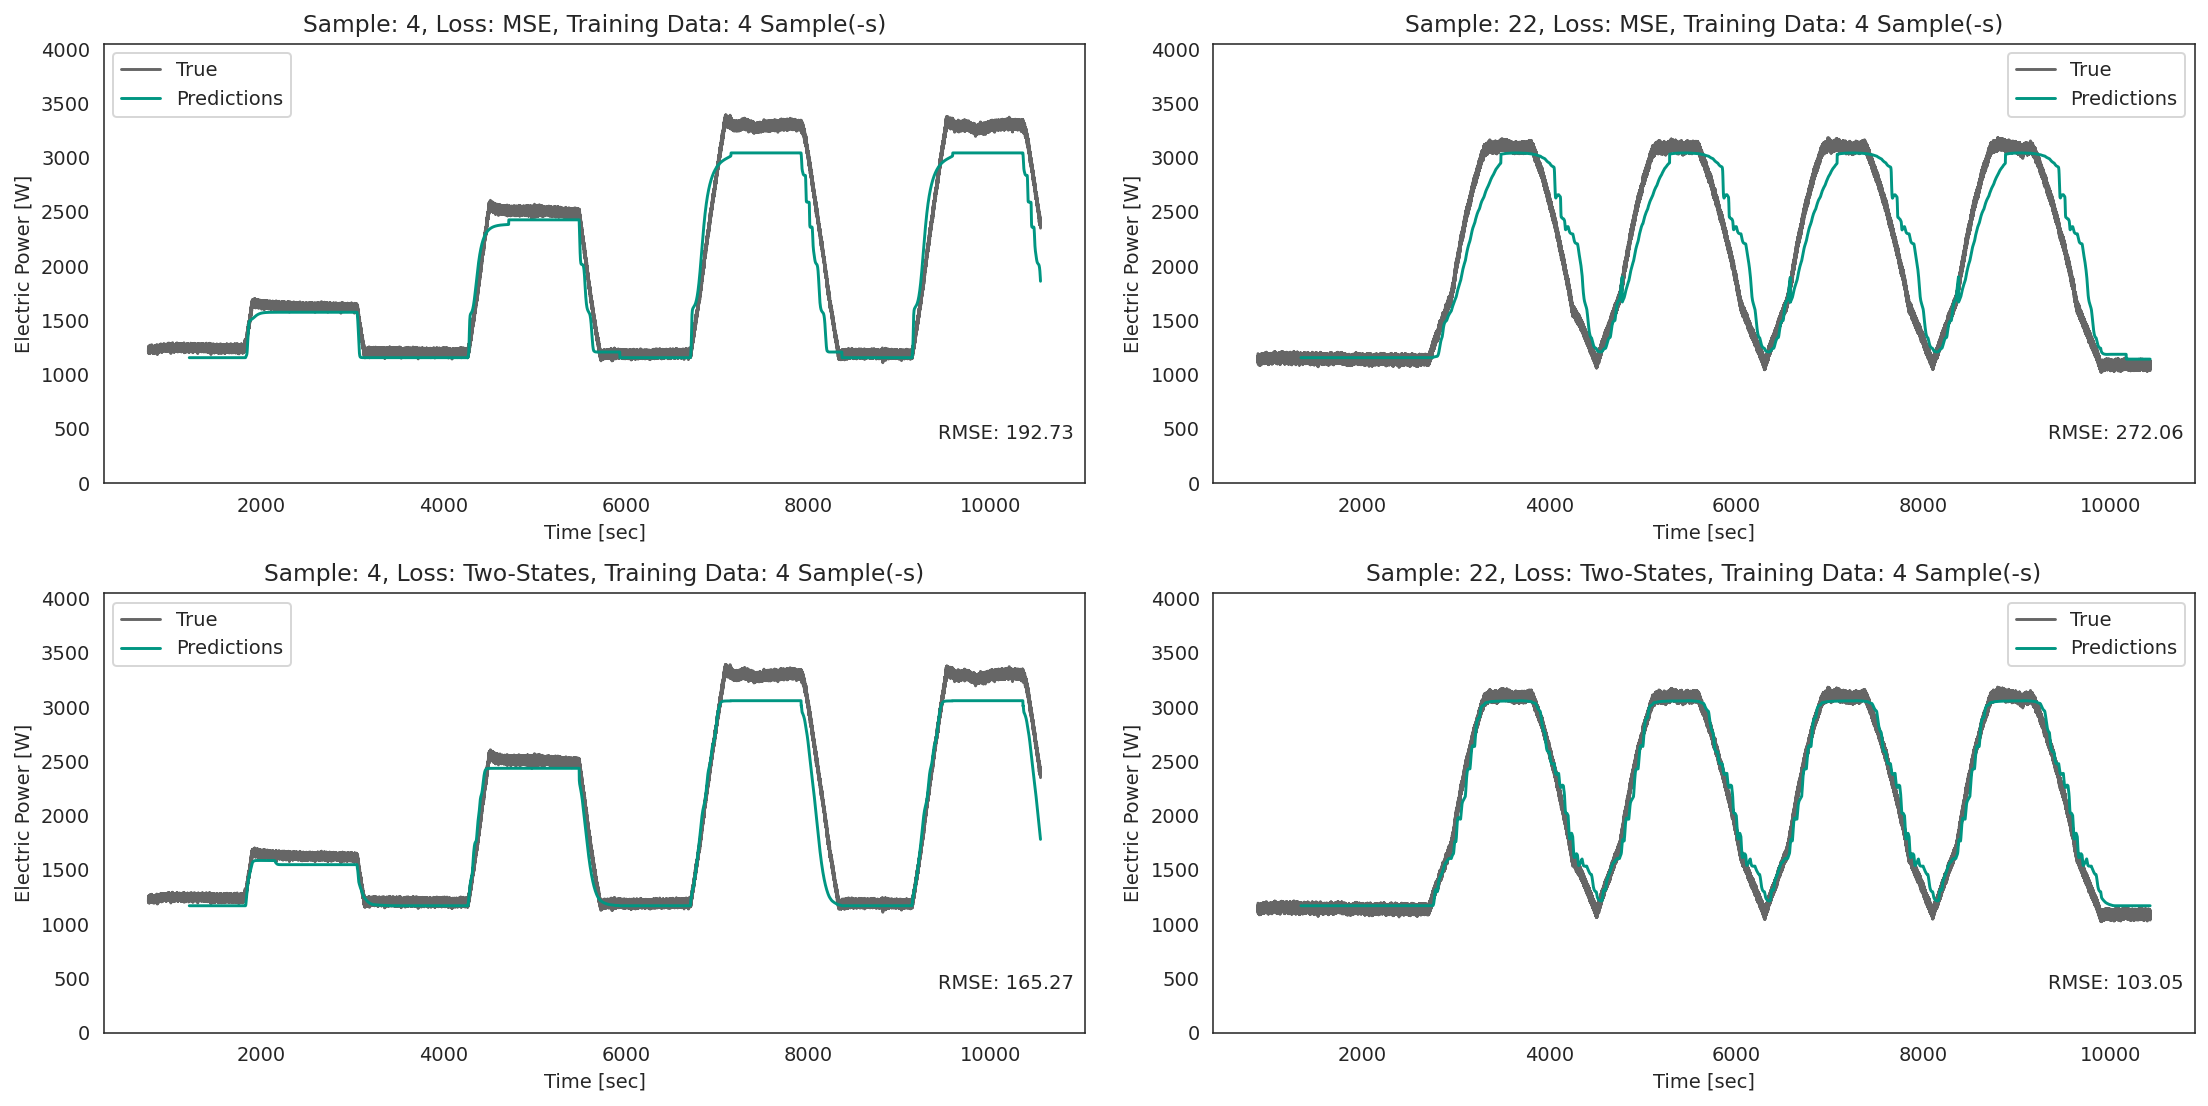

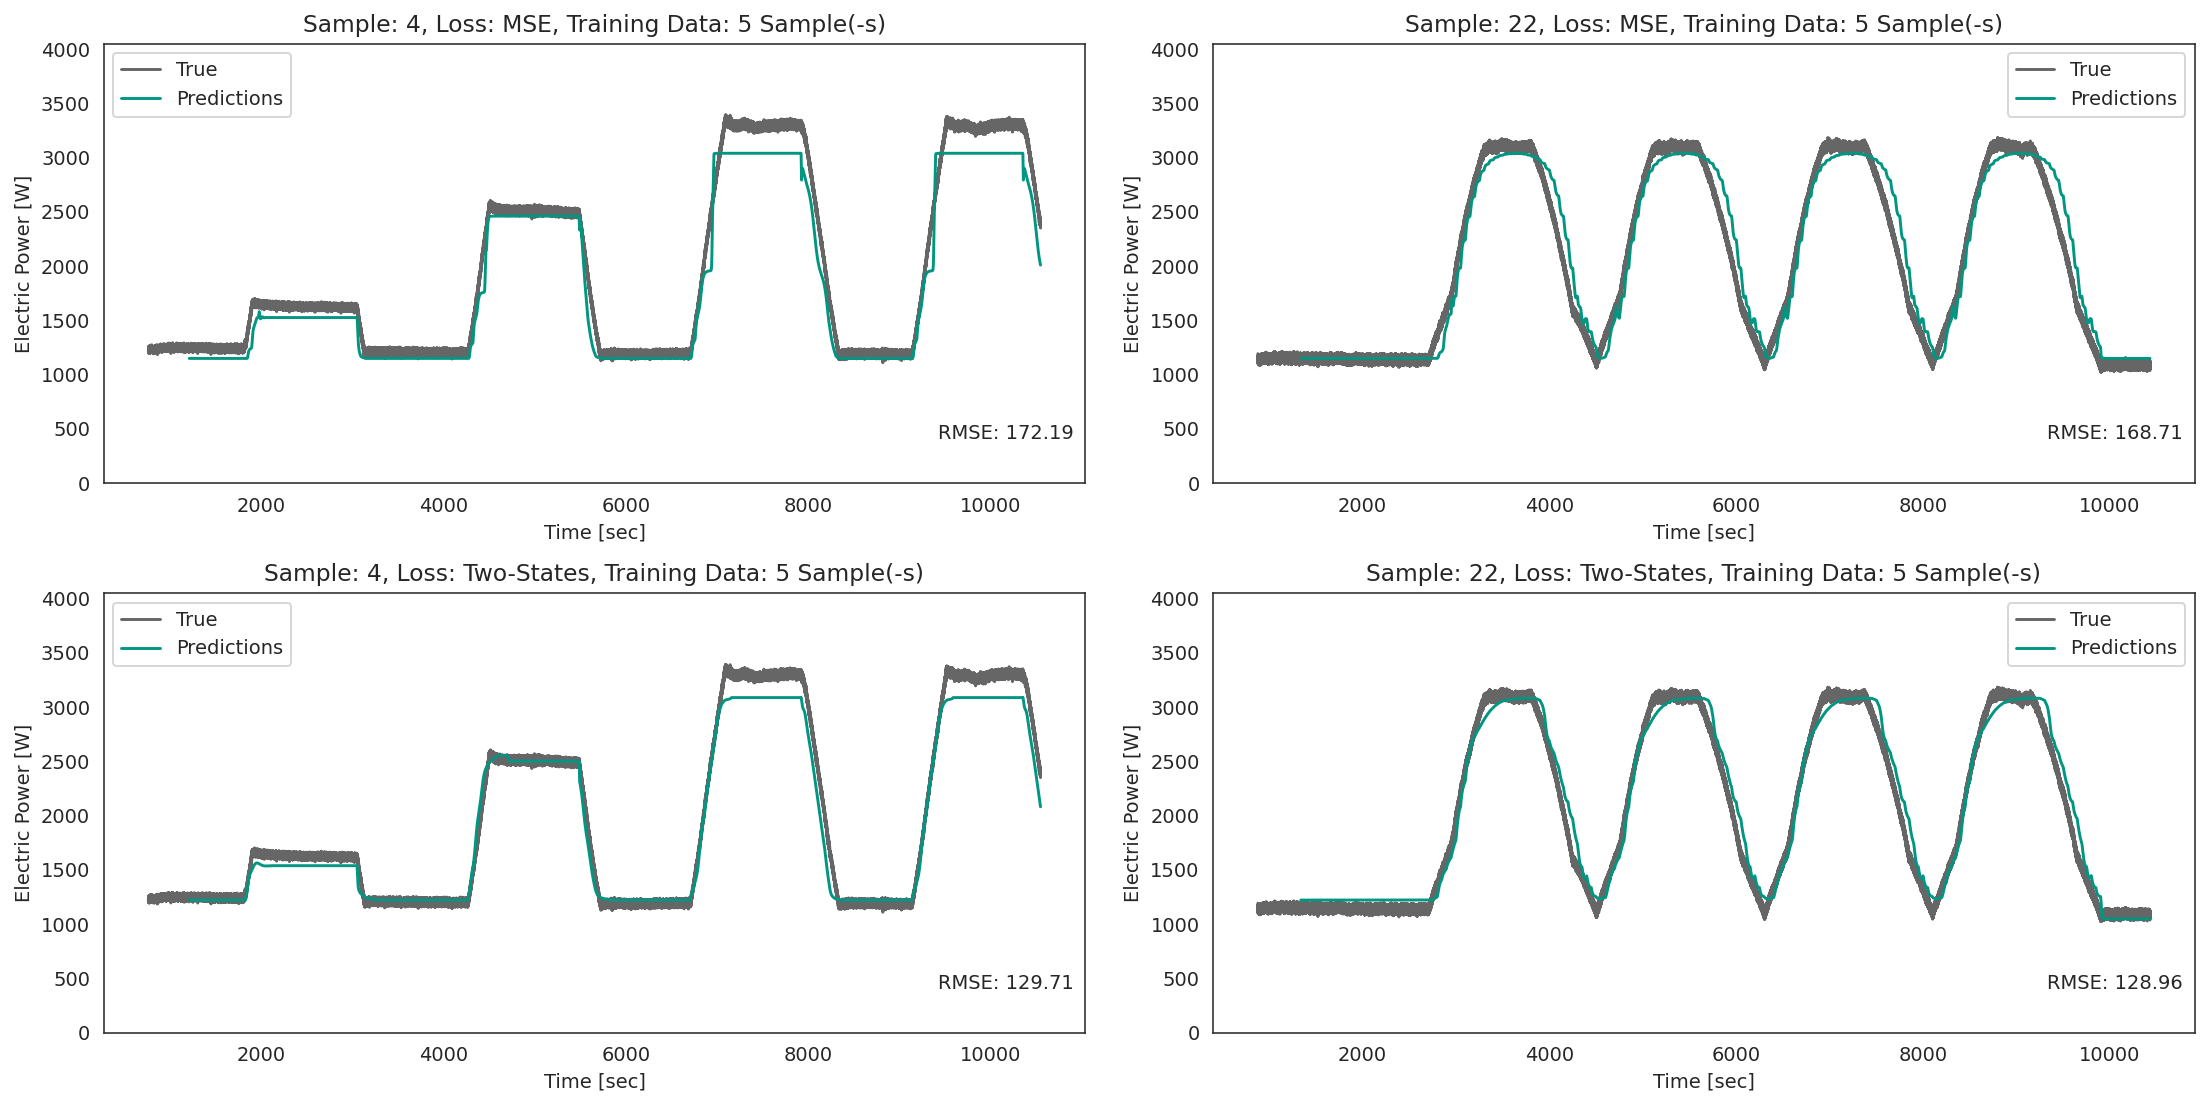

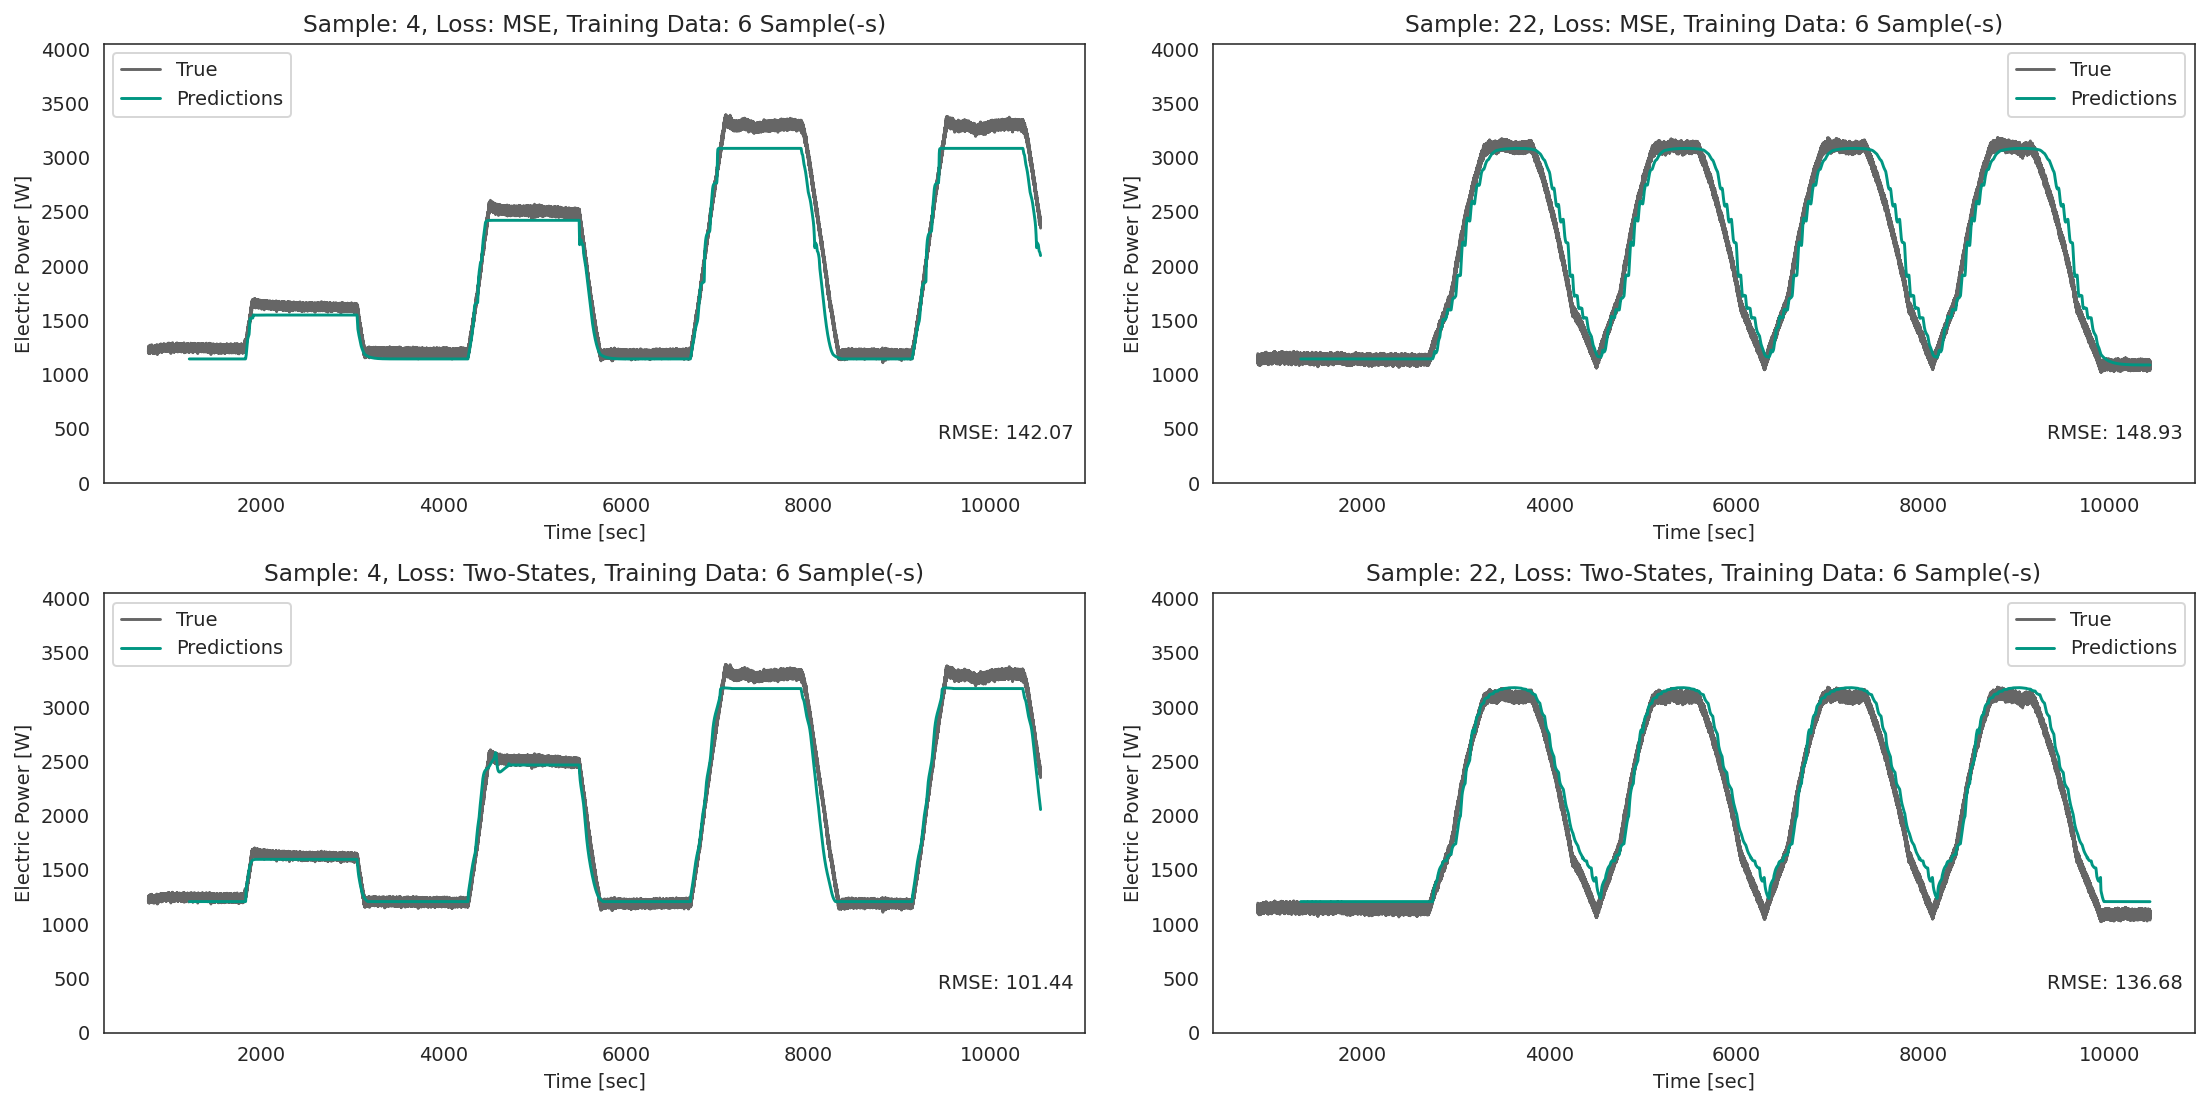

In [6]:
df_4 = pd.read_csv('ex_4.csv')
df_22 = pd.read_csv('ex_22.csv')

for n_train_samples in range(1, 7):

    df_4_pred = pd.read_csv(f'{n_train_samples}_ex_4_pred.csv')
    df_22_pred = pd.read_csv(f'{n_train_samples}_ex_22_pred.csv')

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), dpi=140)

    plot_config = [
        (df_4, df_4_pred, axes[0, 0], 4, 'MSE', 'mse_pred'),
        (df_22, df_22_pred, axes[0, 1], 22, 'MSE', 'mse_pred'),
        (df_4, df_4_pred, axes[1, 0], 4, 'Two-States', 'ts_pred'),
        (df_22, df_22_pred, axes[1, 1], 22, 'Two-States', 'ts_pred')
    ]

    for df, df_pred, ax, sample_id, loss_type, pred_col in plot_config:
        plot_and_calculate_rmse(df, df_pred, ax, sample_id, loss_type, pred_col, n_train_samples)

    fig.tight_layout()
    plt.show()

## Figure 6: Prediction error over hyperparameter $\lambda_{K}$ for $\beta^{stat}/ \beta^{trans} = 1$.

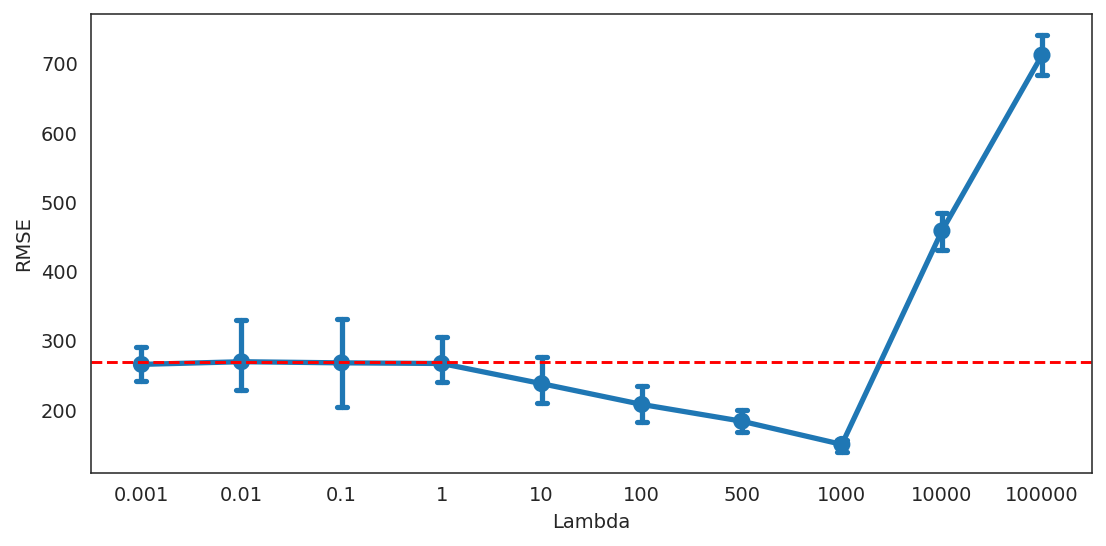

In [7]:
data = pd.read_csv('lambda.csv')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4), dpi=140)
sns.pointplot(
    ax=axes,
    data=data,
    x="lambda",
    y="test_rmse",
    capsize=0.1,
    errorbar='sd',
).set(xlabel="Lambda", ylabel="RMSE")

plt.axhline(y=mse_4, linestyle='--', label='mean_squared_error', color='red')

current_labels = [float(label.get_text()) for label in axes.get_xticklabels()]
formatted_labels = [f"{int(label)}" if label.is_integer() else f"{label}" for label in current_labels]
axes.set_xticklabels(formatted_labels)

fig.tight_layout()
plt.show()

## Figure 7: Prediction error over hyperparameter $\beta^{stat}/ \beta^{trans}$ for $\lambda_{K} = 1000$.

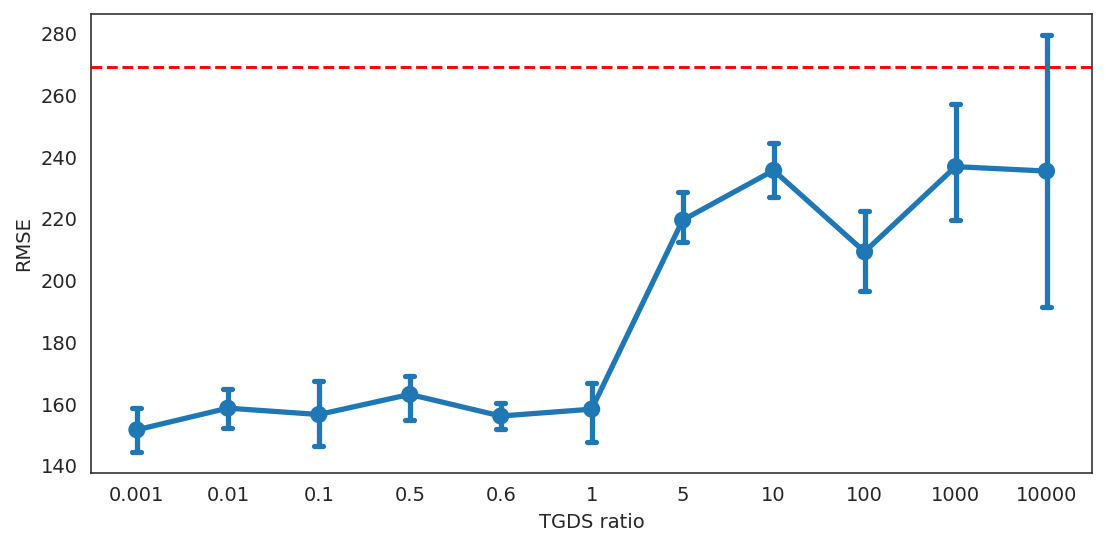

In [8]:
data = pd.read_csv('tgds.csv')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4), dpi=140)
sns.pointplot(
    ax=axes,
    data=data,
    x="tgds_ratio",
    y="test_rmse",
    capsize=0.1,
    errorbar='sd',
).set(xlabel="TGDS ratio", ylabel="RMSE")

plt.axhline(y=mse_4, linestyle='--', label='mean_squared_error', color='red')

tgds_ratios = [float(label.get_text()) for label in axes.get_xticklabels()]
custom_labels = [f'{int(ratio)}' if ratio.is_integer() else f'{ratio}' for ratio in tgds_ratios]
axes.set_xticklabels(custom_labels)

fig.tight_layout()
plt.show()

## Figure 8: All available time series in our dataset.

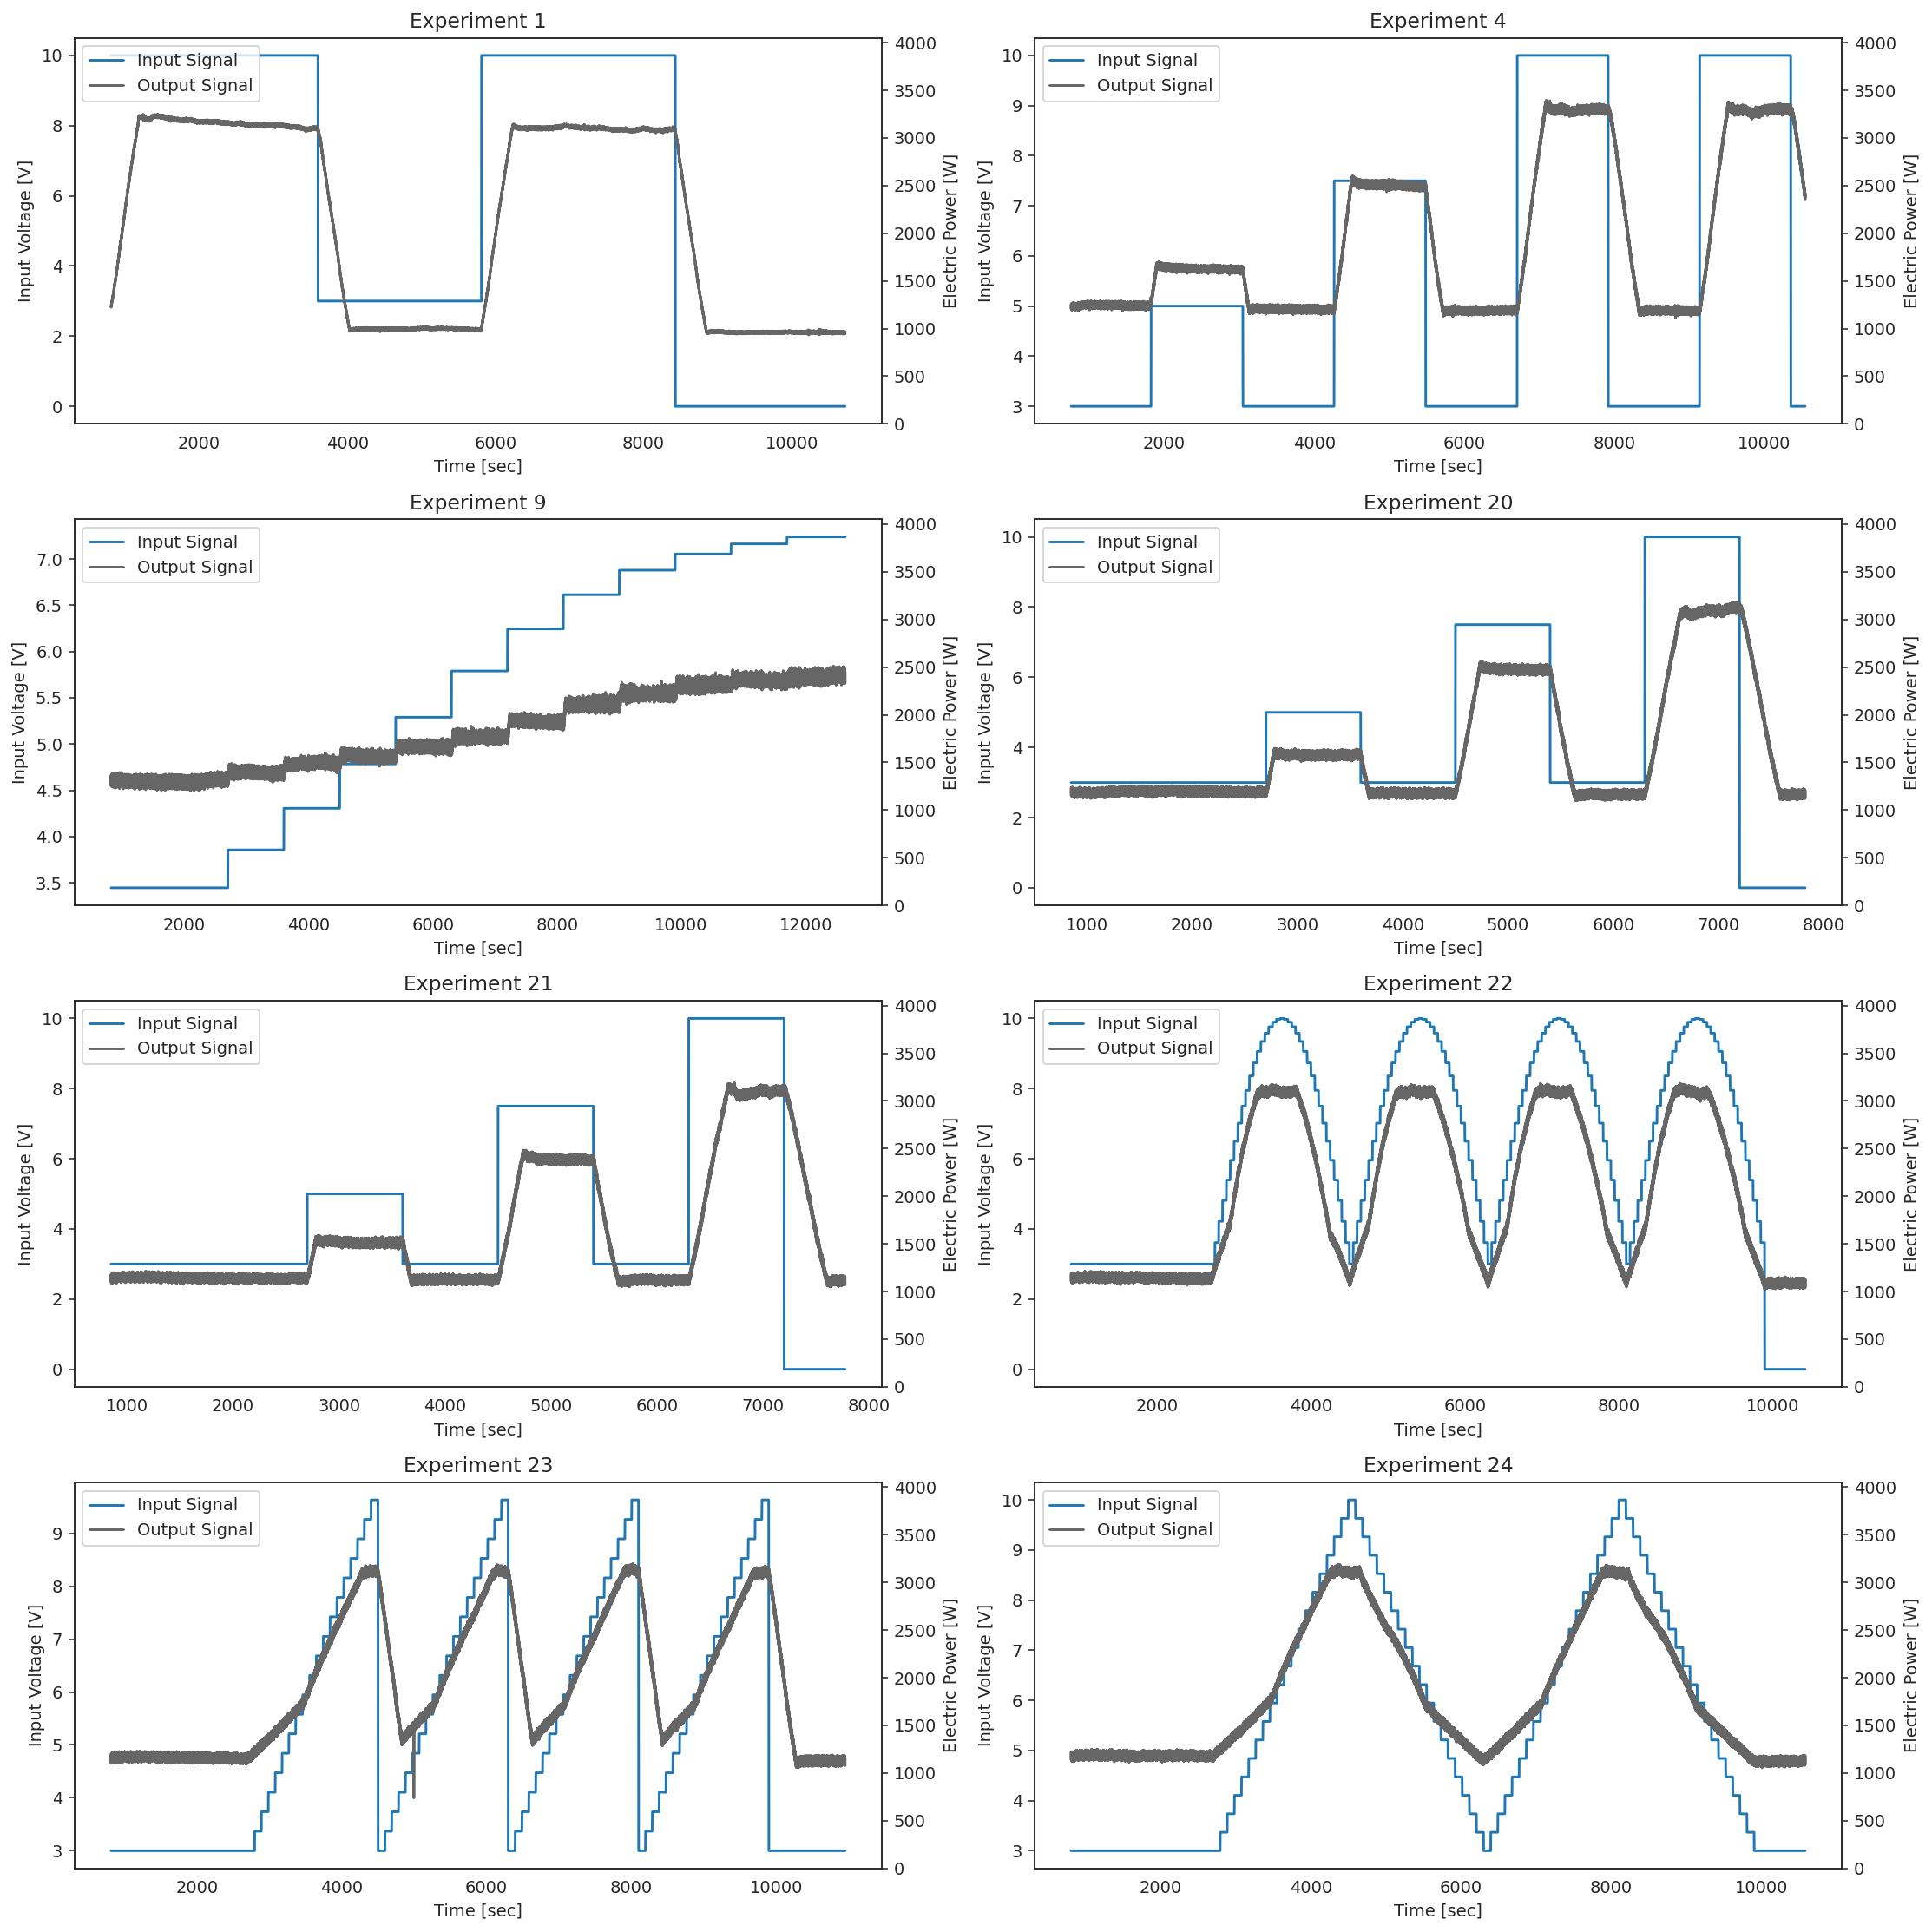

In [9]:
dataset_names = [1, 4, 9, 20, 21, 22, 23, 24]
datasets = {f"{name}": pd.read_csv(f'ex_{name}.csv') for name in dataset_names}

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16), dpi=140)

for ax, (name, df) in zip(axes.flatten(), datasets.items()):
    plot_dataset(ax, df)
    ax.set_title(f'Experiment {name}')

fig.tight_layout()
plt.show()